<a href="https://colab.research.google.com/github/AnkushSaini22/Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

file_path = "/content/Customer_Churn_Data_Large (2).xlsx"

excel_file = pd.ExcelFile(file_path)


In [ ]:
print(excel_file.sheet_names)


['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']


In [ ]:
cdf = pd.read_excel(file_path, sheet_name='Customer_Demographics')
tdf = pd.read_excel(file_path, sheet_name='Transaction_History')
csdf = pd.read_excel(file_path, sheet_name='Customer_Service')
odf = pd.read_excel(file_path, sheet_name='Online_Activity')
chsdf = pd.read_excel(file_path, sheet_name='Churn_Status')


In [ ]:
tdf = tdf.drop(['TransactionID','TransactionDate'], axis='columns')
csdf = csdf.drop(['InteractionID','InteractionDate'], axis='columns')
odf = odf.drop(['LastLoginDate'], axis='columns')


In [ ]:
cdf = cdf.merge(chsdf, on="CustomerID", how="left")
cdf = cdf.merge(odf, on="CustomerID", how="left")

In [ ]:
cdf.head(10)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LoginFrequency,ServiceUsage
0,1,62,M,Single,Low,0,34,Mobile App
1,2,65,M,Married,Low,1,5,Website
2,3,18,M,Single,Low,0,3,Website
3,4,21,M,Widowed,Low,0,2,Website
4,5,21,M,Divorced,Medium,0,41,Website
5,6,57,F,Divorced,Medium,0,2,Website
6,7,27,F,Married,High,0,32,Mobile App
7,8,37,M,Single,Low,1,17,Online Banking
8,9,39,M,Divorced,High,0,24,Website
9,10,68,M,Married,High,1,29,Online Banking


In [ ]:
# Total spend per customer
total_spend = tdf.groupby('CustomerID')['AmountSpent'].sum().reset_index()
total_spend.rename(columns={'AmountSpent':'TotalSpend'}, inplace=True)

print(total_spend)


     CustomerID  TotalSpend
0             1      416.50
1             2     1547.42
2             3     1702.98
3             4      917.29
4             5     2001.49
..          ...         ...
995         996      227.25
996         997      419.82
997         998      252.15
998         999     2393.26
999        1000     1670.79

[1000 rows x 2 columns]


In [ ]:
df_drop = tdf.drop(columns=['AmountSpent'])
print(df_drop)


      CustomerID ProductCategory
0              1     Electronics
1              2        Clothing
2              2     Electronics
3              2       Furniture
4              2        Clothing
...          ...             ...
5049        1000       Groceries
5050        1000           Books
5051        1000       Groceries
5052        1000           Books
5053        1000       Furniture

[5054 rows x 2 columns]


In [ ]:
df_encoded = pd.get_dummies(df_drop, columns=['ProductCategory'])
print(df_encoded)


      CustomerID  ProductCategory_Books  ProductCategory_Clothing  \
0              1                  False                     False   
1              2                  False                      True   
2              2                  False                     False   
3              2                  False                     False   
4              2                  False                      True   
...          ...                    ...                       ...   
5049        1000                  False                     False   
5050        1000                   True                     False   
5051        1000                  False                     False   
5052        1000                   True                     False   
5053        1000                  False                     False   

      ProductCategory_Electronics  ProductCategory_Furniture  \
0                            True                      False   
1                           False          

In [ ]:
df_customer_cat = df_encoded.groupby('CustomerID').sum().reset_index()
print(df_customer_cat)


     CustomerID  ProductCategory_Books  ProductCategory_Clothing  \
0             1                      0                         0   
1             2                      0                         2   
2             3                      1                         1   
3             4                      0                         1   
4             5                      0                         0   
..          ...                    ...                       ...   
995         996                      1                         0   
996         997                      0                         0   
997         998                      1                         0   
998         999                      1                         0   
999        1000                      2                         0   

     ProductCategory_Electronics  ProductCategory_Furniture  \
0                              1                          0   
1                              3                         

In [ ]:
tdf = pd.merge(total_spend, df_customer_cat, on='CustomerID')
print(tdf)


     CustomerID  TotalSpend  ProductCategory_Books  ProductCategory_Clothing  \
0             1      416.50                      0                         0   
1             2     1547.42                      0                         2   
2             3     1702.98                      1                         1   
3             4      917.29                      0                         1   
4             5     2001.49                      0                         0   
..          ...         ...                    ...                       ...   
995         996      227.25                      1                         0   
996         997      419.82                      0                         0   
997         998      252.15                      1                         0   
998         999     2393.26                      1                         0   
999        1000     1670.79                      2                         0   

     ProductCategory_Electronics  Produ

In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1000 non-null   int64  
 1   TotalSpend                   1000 non-null   float64
 2   ProductCategory_Books        1000 non-null   int64  
 3   ProductCategory_Clothing     1000 non-null   int64  
 4   ProductCategory_Electronics  1000 non-null   int64  
 5   ProductCategory_Furniture    1000 non-null   int64  
 6   ProductCategory_Groceries    1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [ ]:
csdf.tail()

,CustomerID,InteractionType,ResolutionStatus
997,990,Complaint,Unresolved
998,992,Feedback,Unresolved
999,994,Complaint,Unresolved
1000,994,Complaint,Unresolved
1001,995,Inquiry,Resolved


In [ ]:
csdf_encoded = pd.get_dummies(csdf, columns=['InteractionType', 'ResolutionStatus'])
csdf = csdf_encoded.groupby('CustomerID').sum().reset_index()
print(csdf)



     CustomerID  InteractionType_Complaint  InteractionType_Feedback  \
0             1                          0                         0   
1             2                          0                         0   
2             3                          0                         0   
3             4                          0                         0   
4             6                          0                         1   
..          ...                        ...                       ...   
663         989                          2                         0   
664         990                          1                         1   
665         992                          0                         1   
666         994                          2                         0   
667         995                          0                         0   

     InteractionType_Inquiry  ResolutionStatus_Resolved  \
0                          1                          1   
1                

In [ ]:
cdf = cdf.merge(csdf, on="CustomerID", how="left")
cdf = cdf.merge(tdf, on="CustomerID", how="left")

In [ ]:
cdf.shape

(1000, 19)

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   MaritalStatus                1000 non-null   object 
 4   IncomeLevel                  1000 non-null   object 
 5   ChurnStatus                  1000 non-null   int64  
 6   LoginFrequency               1000 non-null   int64  
 7   ServiceUsage                 1000 non-null   object 
 8   InteractionType_Complaint    668 non-null    float64
 9   InteractionType_Feedback     668 non-null    float64
 10  InteractionType_Inquiry      668 non-null    float64
 11  ResolutionStatus_Resolved    668 non-null    float64
 12  ResolutionStatus_Unresolved  668 non-null    float64
 13  TotalSpend         

In [ ]:
print(cdf.isnull().sum())

CustomerID                       0
Age                              0
Gender                           0
MaritalStatus                    0
IncomeLevel                      0
ChurnStatus                      0
LoginFrequency                   0
ServiceUsage                     0
InteractionType_Complaint      332
InteractionType_Feedback       332
InteractionType_Inquiry        332
ResolutionStatus_Resolved      332
ResolutionStatus_Unresolved    332
TotalSpend                       0
ProductCategory_Books            0
ProductCategory_Clothing         0
ProductCategory_Electronics      0
ProductCategory_Furniture        0
ProductCategory_Groceries        0
dtype: int64


In [ ]:
cdf['InteractionType_Complaint'] = cdf['InteractionType_Complaint'].fillna(0)
cdf['InteractionType_Feedback'] = cdf['InteractionType_Feedback'].fillna(0)
cdf['InteractionType_Inquiry'] = cdf['InteractionType_Inquiry'].fillna(0)
cdf['ResolutionStatus_Resolved'] = cdf['ResolutionStatus_Resolved'].fillna(0)
cdf['ResolutionStatus_Unresolved'] = cdf['ResolutionStatus_Unresolved'].fillna(0)



In [ ]:
cdf.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LoginFrequency,ServiceUsage,InteractionType_Complaint,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Resolved,ResolutionStatus_Unresolved,TotalSpend,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries
0,1,62,M,Single,Low,0,34,Mobile App,0.0,0.0,1.0,1.0,0.0,416.50,0,0,1,0,0
1,2,65,M,Married,Low,1,5,Website,0.0,0.0,1.0,1.0,0.0,1547.42,0,2,3,1,1
2,3,18,M,Single,Low,0,3,Website,0.0,0.0,1.0,1.0,0.0,1702.98,1,1,0,2,2
3,4,21,M,Widowed,Low,0,2,Website,0.0,0.0,2.0,1.0,1.0,917.29,0,1,2,1,1
4,5,21,M,Divorced,Medium,0,41,Website,0.0,0.0,0.0,0.0,0.0,2001.49,0,0,3,2,3


In [ ]:
df = cdf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   MaritalStatus                1000 non-null   object 
 4   IncomeLevel                  1000 non-null   object 
 5   ChurnStatus                  1000 non-null   int64  
 6   LoginFrequency               1000 non-null   int64  
 7   ServiceUsage                 1000 non-null   object 
 8   InteractionType_Complaint    1000 non-null   float64
 9   InteractionType_Feedback     1000 non-null   float64
 10  InteractionType_Inquiry      1000 non-null   float64
 11  ResolutionStatus_Resolved    1000 non-null   float64
 12  ResolutionStatus_Unresolved  1000 non-null   float64
 13  TotalSpend         

In [ ]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LoginFrequency,ServiceUsage,InteractionType_Complaint,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Resolved,ResolutionStatus_Unresolved,TotalSpend,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries
0,1,62,M,Single,Low,0,34,Mobile App,0.0,0.0,1.0,1.0,0.0,416.50,0,0,1,0,0
1,2,65,M,Married,Low,1,5,Website,0.0,0.0,1.0,1.0,0.0,1547.42,0,2,3,1,1
2,3,18,M,Single,Low,0,3,Website,0.0,0.0,1.0,1.0,0.0,1702.98,1,1,0,2,2
3,4,21,M,Widowed,Low,0,2,Website,0.0,0.0,2.0,1.0,1.0,917.29,0,1,2,1,1
4,5,21,M,Divorced,Medium,0,41,Website,0.0,0.0,0.0,0.0,0.0,2001.49,0,0,3,2,3


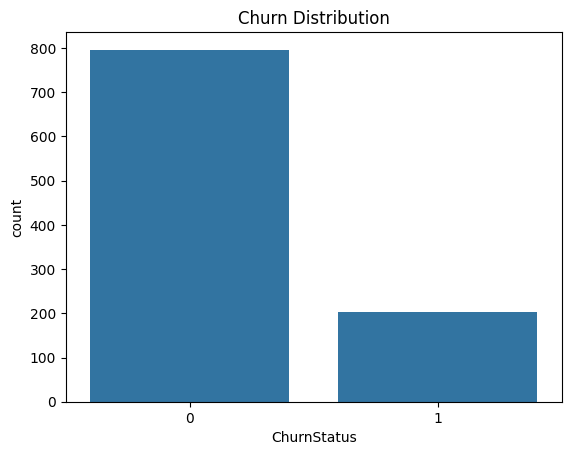

ChurnStatus
0    79.6
1    20.4
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='ChurnStatus', data=df)
plt.title("Churn Distribution")
plt.show()

print(df['ChurnStatus'].value_counts(normalize=True)*100)


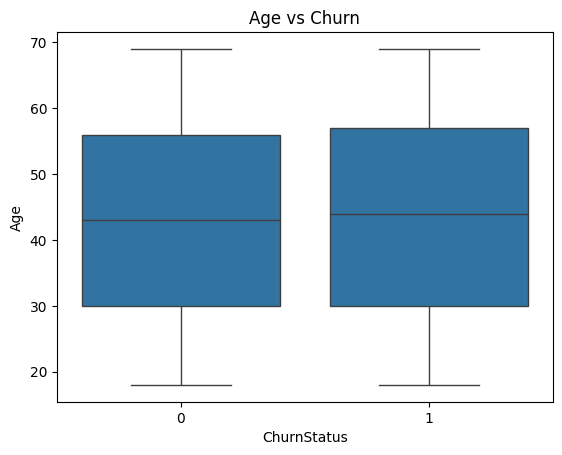

In [ ]:
sns.boxplot(x='ChurnStatus', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


In [ ]:
pd.crosstab(df['Gender'], df['ChurnStatus'], normalize='index') * 100


ChurnStatus,0,1
Gender,,
F,80.311891,19.688109
M,78.850103,21.149897


In [ ]:
pd.crosstab(df['MaritalStatus'], df['ChurnStatus'], normalize='index') * 100


ChurnStatus,0,1
MaritalStatus,,
Divorced,81.451613,18.548387
Married,77.011494,22.988506
Single,79.534884,20.465116
Widowed,80.434783,19.565217


In [ ]:
pd.crosstab(df['IncomeLevel'], df['ChurnStatus'], normalize='index') * 100


ChurnStatus,0,1
IncomeLevel,,
High,80.802292,19.197708
Low,77.846154,22.153846
Medium,80.061350,19.938650


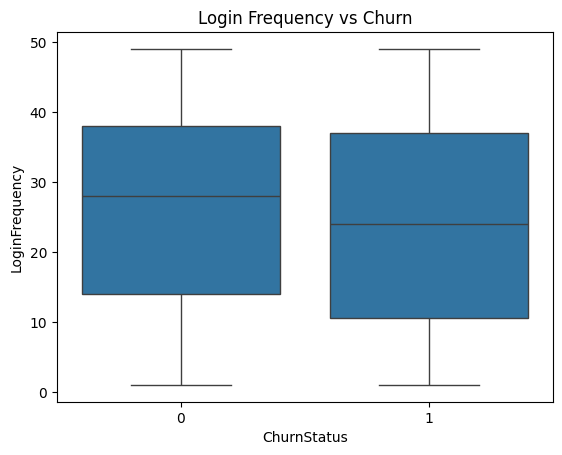

In [ ]:
sns.boxplot(x='ChurnStatus', y='LoginFrequency', data=df)
plt.title("Login Frequency vs Churn")
plt.show()


In [ ]:
pd.crosstab(df['ServiceUsage'], df['ChurnStatus'], normalize='index') * 100


ChurnStatus,0,1
ServiceUsage,,
Mobile App,76.900585,23.099415
Online Banking,79.942693,20.057307
Website,82.200647,17.799353


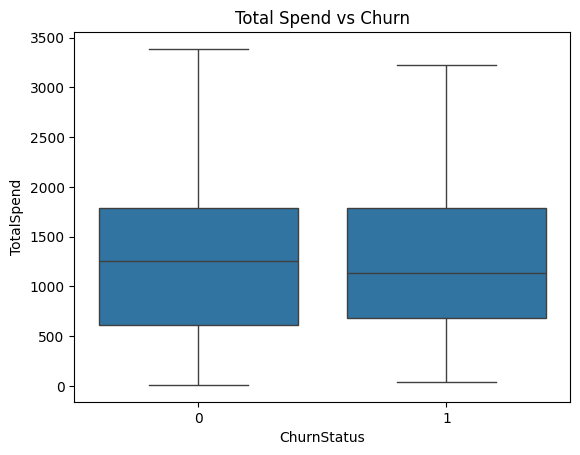

In [ ]:
sns.boxplot(x='ChurnStatus', y='TotalSpend', data=df)
plt.title("Total Spend vs Churn")
plt.show()


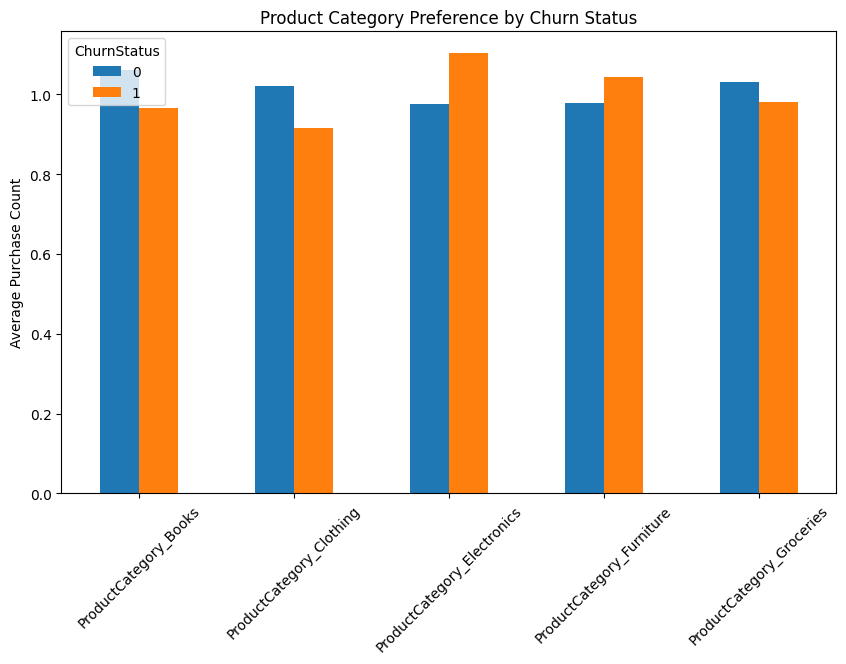

In [ ]:
product_cols = [col for col in df.columns if "ProductCategory_" in col]

product_churn = df.groupby('ChurnStatus')[product_cols].mean().T
product_churn.plot(kind='bar', figsize=(10,6))

plt.title("Product Category Preference by Churn Status")
plt.ylabel("Average Purchase Count")
plt.xticks(rotation=45)
plt.legend(title="ChurnStatus")
plt.show()


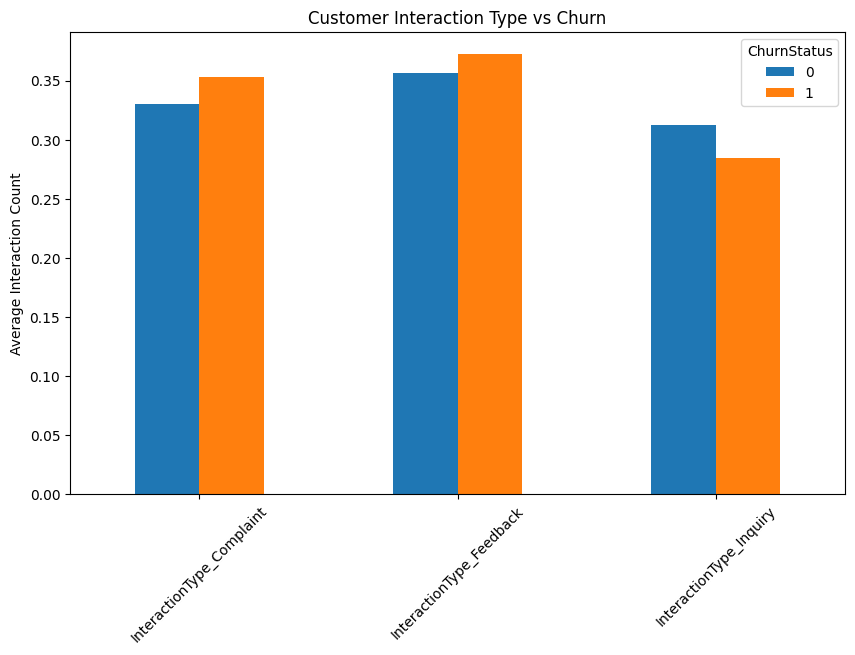

In [ ]:
interaction_cols = [
    'InteractionType_Complaint',
    'InteractionType_Feedback',
    'InteractionType_Inquiry'
]

interaction_churn = df.groupby('ChurnStatus')[interaction_cols].mean().T
interaction_churn.plot(kind='bar', figsize=(10,6))

plt.title("Customer Interaction Type vs Churn")
plt.ylabel("Average Interaction Count")
plt.xticks(rotation=45)
plt.legend(title="ChurnStatus")
plt.show()


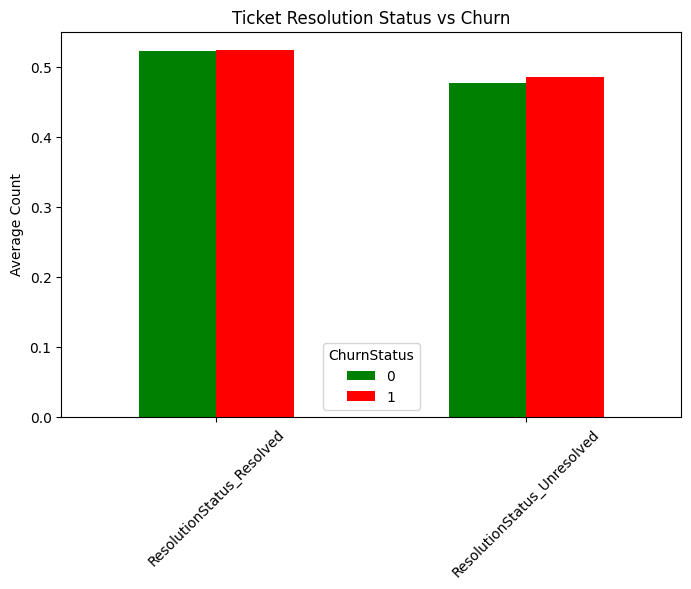

In [ ]:
resolution_cols = [
    'ResolutionStatus_Resolved',
    'ResolutionStatus_Unresolved'
]

resolution_churn = df.groupby('ChurnStatus')[resolution_cols].mean().T
resolution_churn.plot(kind='bar', figsize=(8,5), color=['green','red'])

plt.title("Ticket Resolution Status vs Churn")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="ChurnStatus")
plt.show()


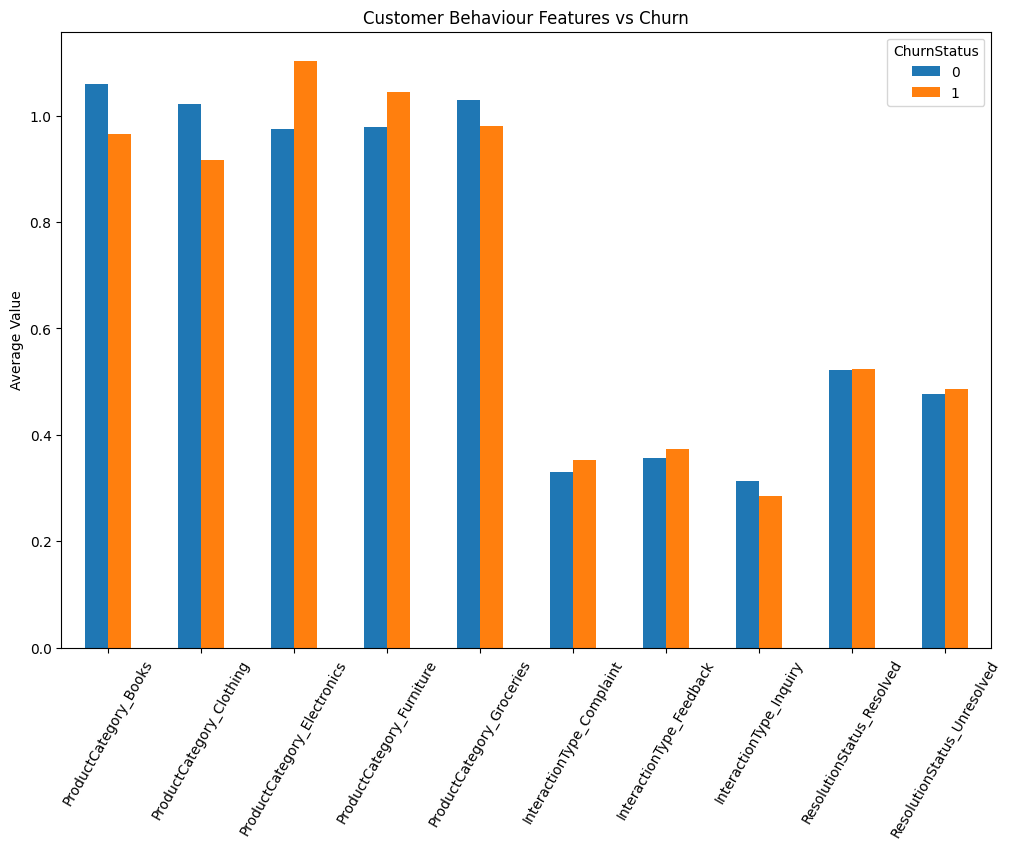

In [ ]:
multi_cols = product_cols + interaction_cols + resolution_cols

multi_churn = df.groupby('ChurnStatus')[multi_cols].mean().T

multi_churn.plot(kind='bar', figsize=(12,8))
plt.title("Customer Behaviour Features vs Churn")
plt.ylabel("Average Value")
plt.xticks(rotation=60)
plt.legend(title="ChurnStatus")
plt.show()


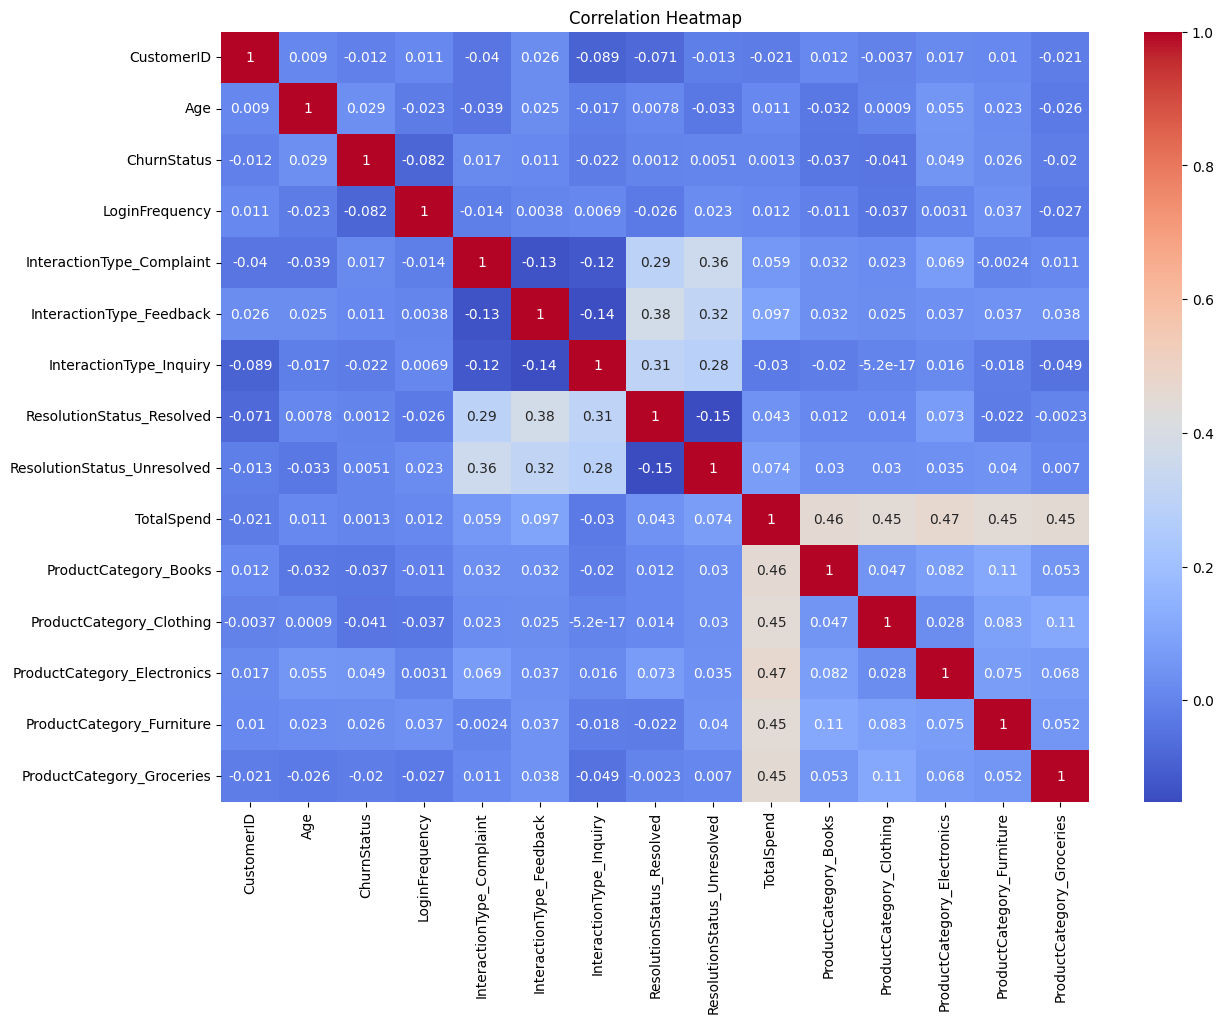

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap")
plt.show()


**MODEL**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.drop(columns=['ChurnStatus', 'CustomerID'])
y = df['ChurnStatus']


In [ ]:
cat_cols = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage']
num_cols = [col for col in X.columns if col not in cat_cols]


In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
log_reg = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    solver='liblinear'
)

log_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', log_reg)
])


In [ ]:
log_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_grid = GridSearchCV(
    log_pipeline,
    log_param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

log_grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'LoginFrequency',
                                                                          'InteractionType_Complaint',
                                                                          'InteractionType_Feedback',
                                                                          'InteractionType_Inquiry',
                                                                          'ResolutionStatus_Resolved',
                                                                          'ResolutionStatus_Unresolved',
                                                                          'TotalSpend',
                                                                          'Prod...
                                                                          'ProductCategory_Electronics',
                                                                          'ProductCategory_Furniture',
                                                                          'ProductCategory_Groceries']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'IncomeLevel',
                                                                          'ServiceUsage'])])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=2000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l1', 'l2']},
             scoring='f1')

In [ ]:
log_best = log_grid.best_estimator_

y_pred_log = log_best.predict(X_test)
y_prob_log = log_best.predict_proba(X_test)[:,1]

print("Best Params:", log_grid.best_params_)
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print(confusion_matrix(y_test, y_pred_log))


Best Params: {'model__C': 0.01, 'model__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.84      0.55      0.66       159
           1       0.26      0.61      0.36        41

    accuracy                           0.56       200
   macro avg       0.55      0.58      0.51       200
weighted avg       0.72      0.56      0.60       200

ROC-AUC: 0.5844454670961803
[[87 72]
 [16 25]]


In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),   # encoding only affects categoricals
    ('model', rf)
])


In [ ]:
rf_param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}


In [ ]:
rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'LoginFrequency',
                                                                          'InteractionType_Complaint',
                                                                          'InteractionType_Feedback',
                                                                          'InteractionType_Inquiry',
                                                                          'ResolutionStatus_Resolved',
                                                                          'ResolutionStatus_Unresolved',
                                                                          'TotalSpend',
                                                                          'Prod...
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'IncomeLevel',
                                                                          'ServiceUsage'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [200, 400]},
             scoring='f1')

In [ ]:
rf_best = rf_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

print("Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(confusion_matrix(y_test, y_pred_rf))


Best Params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       159
           1       0.10      0.02      0.04        41

    accuracy                           0.76       200
   macro avg       0.44      0.48      0.45       200
weighted avg       0.65      0.76      0.69       200

ROC-AUC: 0.5100475533057218
[[150   9]
 [ 40   1]]
